In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#Data path to Canadian population
data_path = os.path.join('Resources', 'canada_population.csv')
population = pd.read_csv(data_path)

#Narrow df and create cplumn for Year(REF_DATE)
population = population[["When", "Canada"]]
population["REF_DATE"] = population["When"].str[-4:]
population = population[["Canada", "REF_DATE"]]
population["REF_DATE"] = population["REF_DATE"].astype(int)
population = population.drop_duplicates(subset=["REF_DATE"], keep='last')

#Narrow the df to the years of overlap between the datasets
population = population.loc[(population["REF_DATE"] >= 2003)&
                     (population["REF_DATE"] <= 2013), :]

#Display df
#population

In [3]:
#Data path to graduation data
data_path = os.path.join("Resources", "graduation_rate.csv")
graduation = pd.read_csv(data_path)

#Narrow df and create column for year
graduation = graduation.loc[graduation["GEO"]=="Canada", :]
graduation["Year"] = graduation["REF_DATE"].str[-4:]
graduation["Year"] = graduation["Year"].astype(int)
graduation = graduation[["Year", "VALUE"]]


#Narrow the df to the years of overlap between the datasets
graduation = graduation.loc[(graduation["Year"] >= 2003)&
                      (graduation["Year"] <= 2013), :]

#Rename year to REF_DATE for merge
graduation = graduation.rename(columns={
     "Year": "REF_DATE"
})

#Display df
#graduation

#Merge dataframes to create %Graduated as a portion of the Canadian population
grad_rate = pd.merge(graduation, population, on="REF_DATE")
grad_rate["% Graduated"] = (grad_rate["VALUE"]/grad_rate["Canada"])*100
grad_rate = grad_rate[["REF_DATE", "% Graduated"]]
#grad_rate

In [4]:
#File path to Alcohol Sales (X-variable)
data_path = os.path.join('Resources', 'alcohol_sales_89_18.csv')
data2 = pd.read_csv(data_path)

#Clean data for total sales of Candian alcoholic beverages
data_clean1 = data2.loc[(data2["GEO"]=="Canada") & (data2["Type of sales"]=="Total sales") &
                        (data2["Type of beverage"]=="Total alcoholic beverages"),:]
alcohol_value = data_clean1[["REF_DATE", "GEO", "Type of beverage", "VALUE"]]

#Narrow the df to the years of overlap between the datasets
alcohol_value = alcohol_value.loc[(alcohol_value["REF_DATE"] >= 1998), :]

#Merge sataset with population and calculate the Alcoholic Beverages sold
merged_alcohol = pd.merge(alcohol_value, population, on="REF_DATE")
merged_alcohol["Alcoholic Beverages per person"] = (merged_alcohol["VALUE"]/merged_alcohol["Canada"])

#Display df
#merged_alcohol

In [5]:
#Create plotting dataframe with merge and clean
complete = pd.merge(grad_rate, merged_alcohol, on="REF_DATE")
complete = complete[["REF_DATE", "Alcoholic Beverages per person", "% Graduated"]]

#rename the columns
complete = complete.rename(columns={
    "REF_DATE": "Date",
})

#Display df
#complete

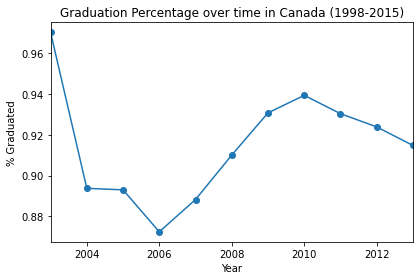

In [11]:
x_axis = complete["Date"]
y_axis = complete["% Graduated"]
plt.plot(x_axis, y_axis, marker="o")
plt.title("Graduation Percentage over time in Canada (1998-2015)")
plt.xlabel("Year")
plt.ylabel("% Graduated")
plt.xlim(2003,2013)
plt.tight_layout()
plt.savefig(os.path.join("Output", "Grad%"), dpi=150)
plt.show()

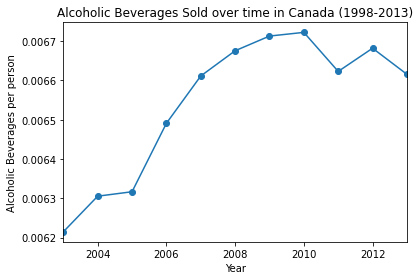

In [12]:
#Establish variables
x_axis = complete["Date"]
y_axis = complete["Alcoholic Beverages per person"]

#Create plot
plt.plot(x_axis, y_axis, marker="o")
plt.title("Alcoholic Beverages Sold over time in Canada (1998-2013)")
plt.xlabel("Year")
plt.ylabel("Alcoholic Beverages per person")
plt.tight_layout()
plt.xlim(2003,2013)
plt.savefig(os.path.join("Output", "Alcohol(2015)"), dpi=150)
plt.show()

In [13]:
x_axis = complete["Alcoholic Beverages per person"]
y_axis = complete["% Graduated"]

In [14]:
#Correlation
corr = round(sts.pearsonr(x_axis, y_axis)[0], 4)

#linear regression and line eq
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

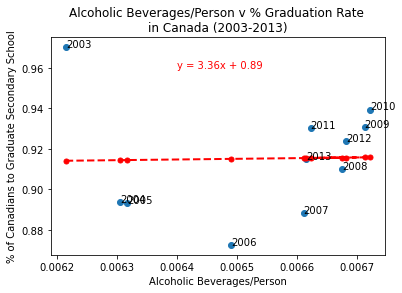

The correlation between Alcohol use and Graduation rate is 0.0221


In [15]:
#Create scatter plot
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis, regress_values, color='r', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.title("Alcoholic Beverages/Person v % Graduation Rate \nin Canada (2003-2013)")
plt.xlabel("Alcoholic Beverages/Person")
plt.ylabel("% of Canadians to Graduate Secondary School")
for i, txt in enumerate(complete["Date"]):
    ax.annotate(txt, (x_axis[i], y_axis[i]))
ax.annotate(line_eq, xy=(0.0064, 0.96), fontsize=10, color="r")
plt.savefig(os.path.join("Output", "Scat-Al-Grad"), dpi=150)
plt.show()
print(f"The correlation between Alcohol use and Graduation rate is {corr}")